In [1]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math
%matplotlib inline


In [2]:
seq_name = "RaceHorses"
QP = "QP37"

In [3]:
def frame_processing(filename,currframe = 0):
    f = open("D:/frame/"+filename+"/"+filename+'%d'%currframe+'.txt', "r")
    rowlist = []
    for line in f:
        rowpix = line.split(" ")
        results = [int(i) for i in rowpix[:-1]]
        rowlist.append(results)
    img = np.asarray(rowlist)
    img = img /4
    return img

In [4]:
def frame_padding(frame,CTU_size = 128):
    width , height = frame.shape[1],frame.shape[0]
    #print(width,height)
    width_CTU_nums = math.ceil(width/128)
    height_CTU_nums = math.ceil(height/128)
    pad_frame = np.zeros((height_CTU_nums*128,width_CTU_nums*128))
    for x in range(height):
        for y in range(width):
            pad_frame[x][y] = frame[x][y]
    return pad_frame

In [5]:
img = frame_processing(seq_name,0)
yuv_img_padding = frame_padding(img)

origin frame:


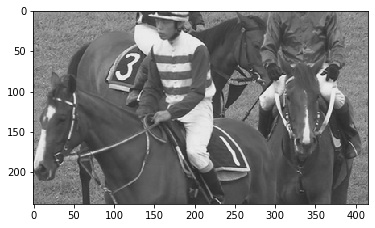

In [6]:
yuv_img = Image.fromarray(img.astype('uint8')).convert('YCbCr')

print("origin frame:")
plt.imshow(yuv_img)

padding frame:


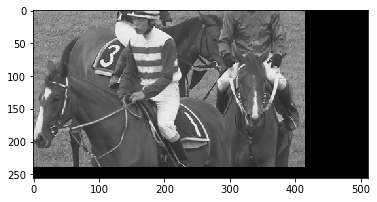

In [7]:
print("padding frame:")
yuv_img_padding = Image.fromarray(yuv_img_padding.astype('uint8')).convert('YCbCr')
plt.imshow(yuv_img_padding)

In [12]:
def frame_partition(test_seq,unit , img , yuv_img , QP = "QP" , currframe = 0):
    frame_width , frame_height = img.shape[1],img.shape[0]
    CTU_NUM = math.ceil(frame_width/128) * math.ceil(frame_height/128)
    frame_partition = np.zeros((frame_height,frame_width))
    fig,ax = plt.subplots(1)
    ax.imshow(yuv_img)
    begin = currframe * CTU_NUM
    for i in range(begin,CTU_NUM+begin):
        f = open("D:/test/"+QP+"/"+unit+'_%d.txt'%(i), "r")
        for line in f:
            row = line.split(" ")
            startx , starty , height , width = int(row[0]) , int(row[1]) , int(row[2]) , int(row[3])
            if startx == 0 and starty==0 and height == 0 and width == 0:
                continue
            rect = patches.Rectangle((startx,starty),width,height,linewidth=1,edgecolor='red',facecolor='none')
            ax.add_patch(rect)
    print(unit+" Partition:")
    plt.show()

CTU Partition:


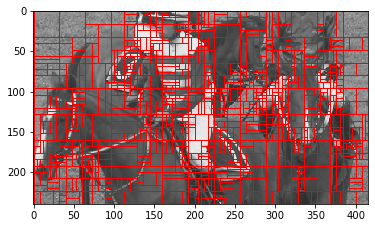

In [13]:
frame_partition(seq_name,"CTU",img,yuv_img,QP,currframe = 0)


#frame_partition(seq_name,"TU",img,yuv_img,QP)